# Feature Engineering Pipeline 2 - Further Analysis using FeatUP

##Deepfake Detection Features with FeatUp (JBU)
Fast Upsampling in a Single Forward Pass with FeatUp (JBU)

> ⚠️ Change your collab runtime to T4 GPU before running this notebook

The primary objective of this notebook is to introduce and detail the application of advanced pre-trained upsamplers, meticulously designed to seamlessly integrate with leading vision backbones, including ViT, DINO, DINO v2, and ResNet50. A distinctive feature of this approach is the incorporation of a Layer Normalization procedure preceding the upsampling phase for each model.  

This strategic enhancement is crucial for those intending to upgrade or replace components within their existing frameworks with our superior variants. This initiative is driven by the urgent need to bolster the capabilities of AI systems in identifying and countering deepfake imagery—a growing concern in digital media integrity. Through elevating image quality and detail processed by these foundational models, we aim to significantly advance their proficiency in distinguishing genuine visuals from sophisticated forgeries, thereby contributing to the broader efforts in maintaining the authenticity and trustworthiness of digital content.

From : https://mhamilton.net/featup.html


In [ ]:
!git clone https://github.com/mhamilton723/FeatUp

Cloning into 'FeatUp'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 231 (delta 12), reused 11 (delta 10), pack-reused 210
Receiving objects: 100% (231/231), 23.35 MiB | 25.08 MiB/s, done.
Resolving deltas: 100% (105/105), done.


## Installing FeatUp and fast Joint Bilateral Upsampling (JBU) Kernel

> ⚠️ This cell will take 3-5 minutes to run because of cuda kernel compilation


In [ ]:
import os
os.chdir("FeatUp/")

In [ ]:
!pip install -e .
!pip install git+https://github.com/mhamilton723/CLIP.git

Obtaining file:///content/FeatUp
  Preparing metadata (setup.py) ... done
  Attempting uninstall: featup
    Found existing installation: featup 0.1.2
    Uninstalling featup-0.1.2:
      Successfully uninstalled featup-0.1.2
  Running setup.py develop for featup
  Cloning https://github.com/mhamilton723/CLIP.git to /tmp/pip-req-build-7w9t8v5b
  Running command git clone --filter=blob:none --quiet https://github.com/mhamilton723/CLIP.git /tmp/pip-req-build-7w9t8v5b
  Resolved https://github.com/mhamilton723/CLIP.git to commit dce9d43cc659cb9a013745b378c78077fde6aac0
  Preparing metadata (setup.py) ... done


In [ ]:
import torch
import torchvision.transforms as T
from PIL import Image

from featup.util import norm, unnorm
from featup.plotting import plot_feats

In [ ]:
#Loading the image from drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Scanning DeepFake Images with CLIP, DINO, DINO v2, and ResNet50.

Lets now work with a Deepfake image generated from thispersondoestnotexist.com and see the results and how the layers can be seen and differentiated in these parts.





In [ ]:
#Loading Deepfake Images from Drive for a test, resizingm and processing is done as well
input_size = 224
image_path = "/content/drive/My Drive/ImagesGotU/DeepfakeImage842.jpeg"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = T.Compose([
    T.Resize(input_size),
    T.CenterCrop((input_size, input_size)),
    T.ToTensor(),
    norm
])

image_tensor = transform(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device)

In [ ]:
#Loading Real Images from Drive for a test, resizingm and processing is done as well
input_size = 224
image_path2 = "/content/drive/My Drive/ImagesGotU/RealImage842.png"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = T.Compose([
    T.Resize(input_size),
    T.CenterCrop((input_size, input_size)),
    T.ToTensor(),
    norm
])

image_tensor2 = transform(Image.open(image_path2).convert("RGB")).unsqueeze(0).to(device)

## DINO

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main
INFO:lightning_fabric.utilities.seed:Seed set to 0


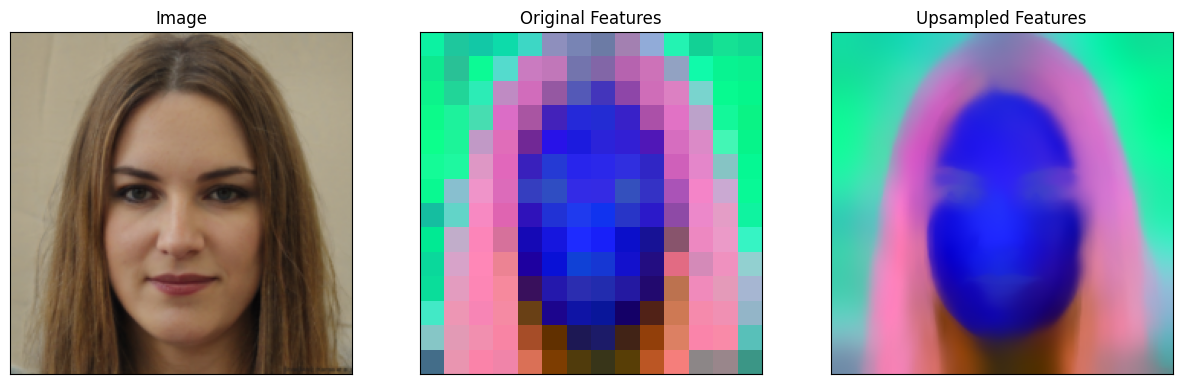

In [ ]:
#Fake Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dino16').to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])


Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main
INFO:lightning_fabric.utilities.seed:Seed set to 0


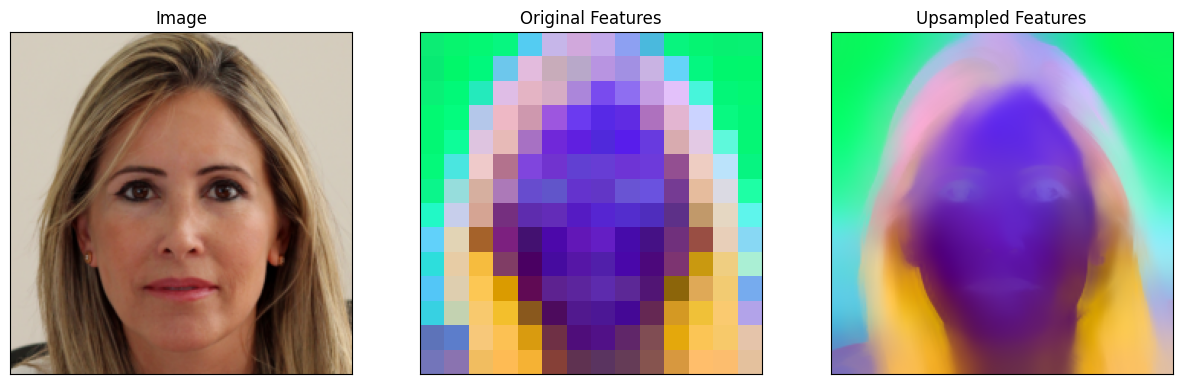

In [ ]:
#Real Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dino16').to(device)
hr_feats = upsampler(image_tensor2)
lr_feats = upsampler.model(image_tensor2)
plot_feats(unnorm(image_tensor2)[0], lr_feats[0], hr_feats[0])

## DINO v2

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main
INFO:lightning_fabric.utilities.seed:Seed set to 0


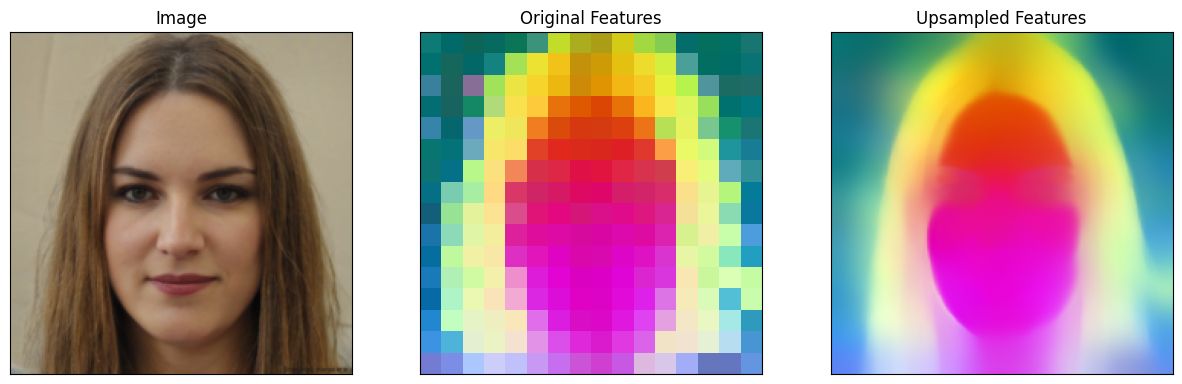

In [ ]:
#Fake Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dinov2').to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main
INFO:lightning_fabric.utilities.seed:Seed set to 0


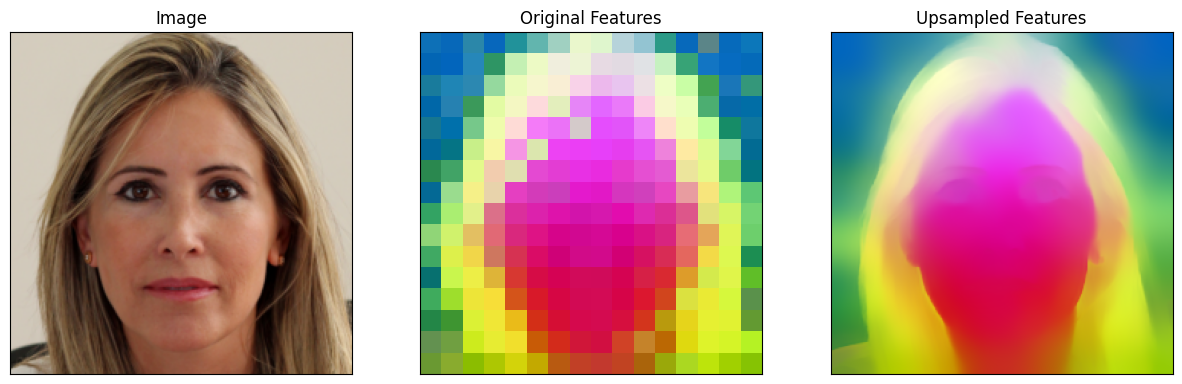

In [ ]:
#Real Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'dinov2').to(device)
hr_feats = upsampler(image_tensor2)
lr_feats = upsampler.model(image_tensor2)
plot_feats(unnorm(image_tensor2)[0], lr_feats[0], hr_feats[0])

## CLIP

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
INFO:lightning_fabric.utilities.seed:Seed set to 0


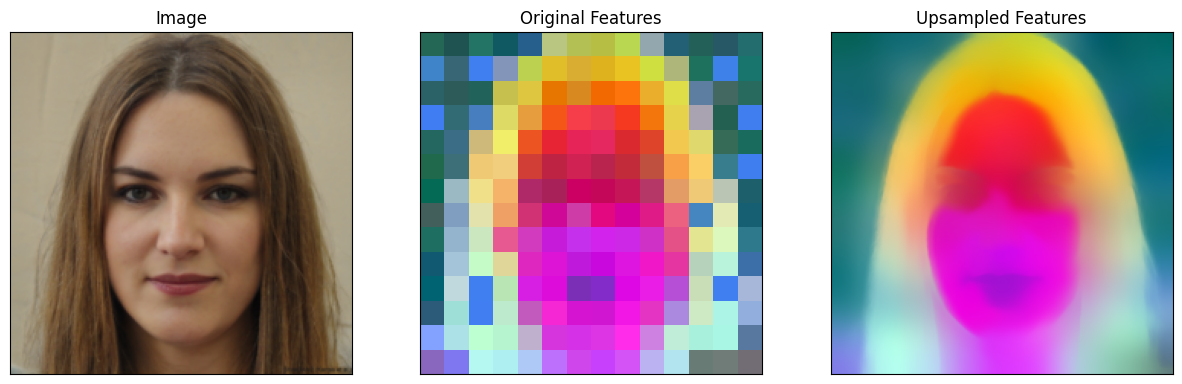

In [ ]:
#Fake Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'clip').to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
INFO:lightning_fabric.utilities.seed:Seed set to 0


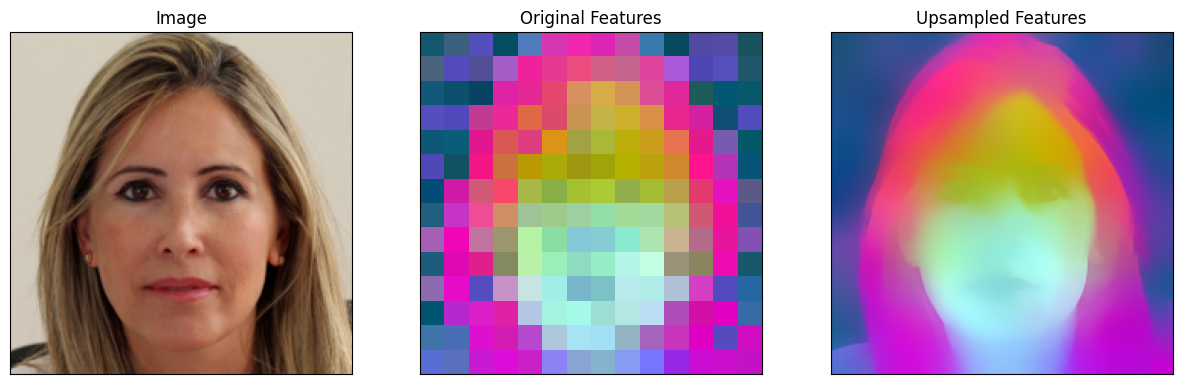

In [ ]:
#Real Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'clip').to(device)
hr_feats = upsampler(image_tensor2)
lr_feats = upsampler.model(image_tensor2)
plot_feats(unnorm(image_tensor2)[0], lr_feats[0], hr_feats[0])

# ViT

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
Downloading: "https://marhamilresearch4.blob.core.windows.net/feature-upsampling-public/pretrained/vit_jbu_stack_cocostuff.ckpt" to /root/.cache/torch/hub/checkpoints/vit_jbu_stack_cocostuff.ckpt
100%|██████████| 2.04M/2.04M [00:00<00:00, 5.46MB/s]
INFO:lightning_fabric.utilities.seed:Seed set to 0


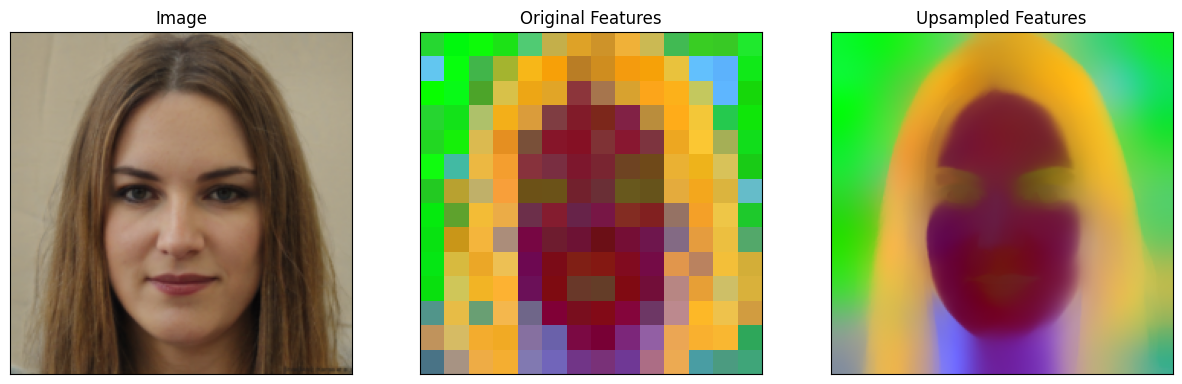

In [ ]:
#Fake Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'vit').to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
INFO:lightning_fabric.utilities.seed:Seed set to 0


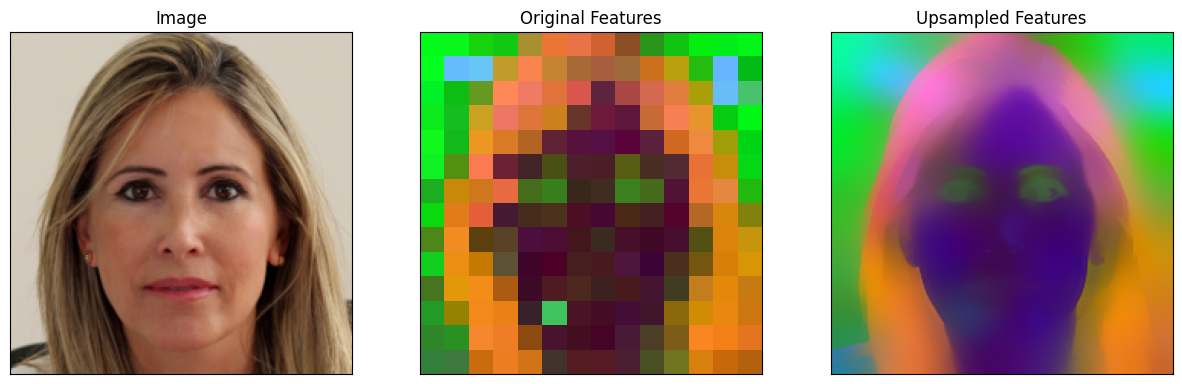

In [ ]:
#Real Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'vit').to(device)
hr_feats = upsampler(image_tensor2)
lr_feats = upsampler.model(image_tensor2)
plot_feats(unnorm(image_tensor2)[0], lr_feats[0], hr_feats[0])

# ResNet 50

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 140MB/s]
Downloading: "https://marhamilresearch4.blob.core.windows.net/feature-upsampling-public/pretrained/resnet50_jbu_stack_cocostuff.ckpt" to /root/.cache/torch/hub/checkpoints/resnet50_jbu_stack_cocostuff.ckpt
100%|██████████| 48.4M/48.4M [00:01<00:00, 32.2MB/s]
INFO:lightning_fabric.utilities.seed:Seed set to 0


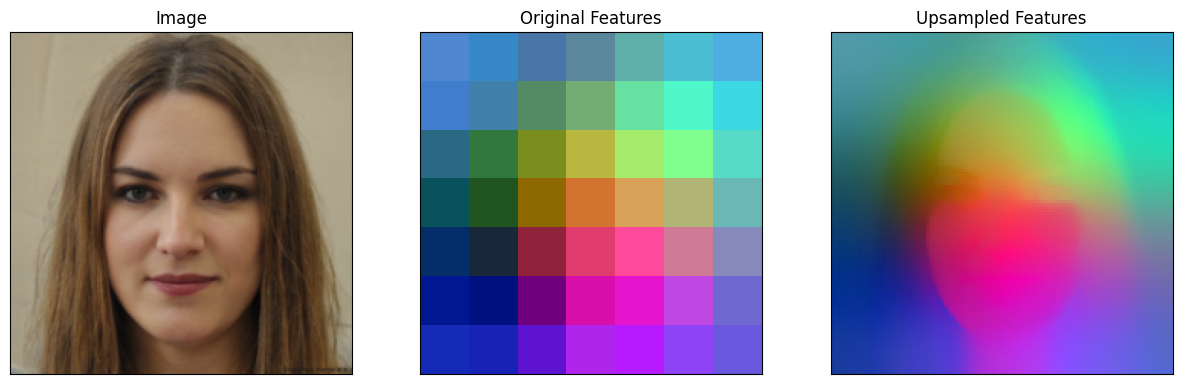

In [ ]:
#Real Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'resnet50').to(device)
hr_feats = upsampler(image_tensor)
lr_feats = upsampler.model(image_tensor)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

Using cache found in /root/.cache/torch/hub/mhamilton723_FeatUp_main
INFO:lightning_fabric.utilities.seed:Seed set to 0


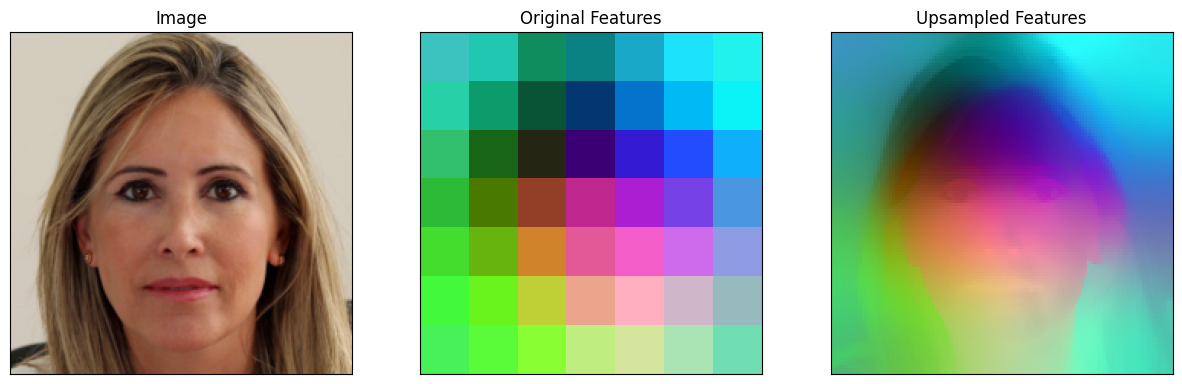

In [ ]:
#fake Image
upsampler = torch.hub.load("mhamilton723/FeatUp", 'resnet50').to(device)
hr_feats = upsampler(image_tensor2)
lr_feats = upsampler.model(image_tensor2)
plot_feats(unnorm(image_tensor2)[0], lr_feats[0], hr_feats[0])

INFO:lightning_fabric.utilities.seed:Seed set to 0


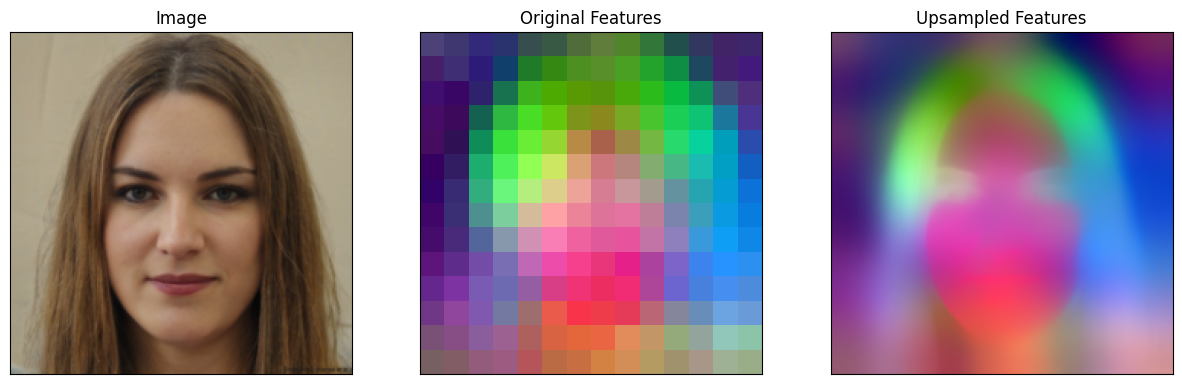

In [ ]:
#Fake Images
import torch.nn.functional as F

big_img = F.interpolate(image_tensor, scale_factor=2, mode='bilinear')
hr_feats = upsampler(big_img)
lr_feats = upsampler.model(big_img)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

INFO:lightning_fabric.utilities.seed:Seed set to 0


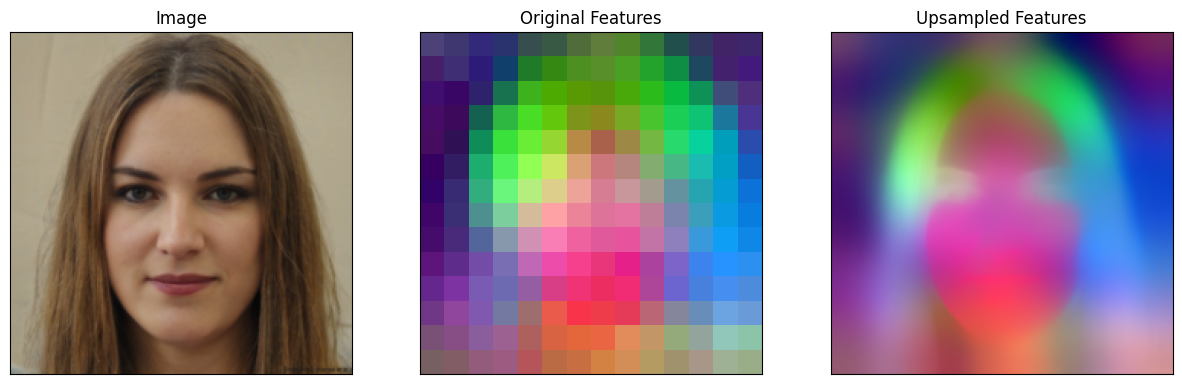

In [ ]:
#Real Image
import torch.nn.functional as F

big_img = F.interpolate(image_tensor, scale_factor=2, mode='bilinear')
hr_feats = upsampler(big_img)
lr_feats = upsampler.model(big_img)
plot_feats(unnorm(image_tensor)[0], lr_feats[0], hr_feats[0])

#Conclusion and Next Steps

- Lime Reinformement, this feature analysis can help us identify how the model is reacting to the images it is extracting.
- What is different from a fake and a real image
- Future use could be increased accuracy and converting features to numerical values
- Next Steps: Check for images with accesories